<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap12/Trial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex > /dev/null && echo "Apex library is successfully installed!"!

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-u92qoh34
Albumentation library is successfully installed!
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-1xhv06cm
  Running command git submodule update --init --recursive -q
Apex library is successfully installed!!


In [2]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap12/'
os.chdir(folder)
print(os.getcwd()) 
for items in os.listdir(folder):
   print(items)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap12
template
Trial1.ipynb
Trial2.ipynb
Untitled0.ipynb
Trial3.ipynb


In [0]:
from template import TinyImageNet
from template import DatasetFromSubset
from template import download_extract
from template import Albumentationtransform

In [5]:
IMAGES_URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
fileName = "tiny-imagenet-200.zip"
download_extract.download_images(IMAGES_URL)

In [6]:
def get_classes(download_folder):
    classes = []
    wnids = open(os.path.join(download_folder,"wnids.txt"), "r")
    for line in wnids:
        classes.append(line.strip())
    return classes

print(folder)
download_folder = folder + 'tiny-imagenet-200/'
if (os.path.isdir(download_folder)==False):
    print(download_folder," does not exist")
else :    
    classes = get_classes(download_folder)
    print(classes)

/content/gdrive/My Drive/school_of_ai/chap12/
['n02124075', 'n04067472', 'n04540053', 'n04099969', 'n07749582', 'n01641577', 'n02802426', 'n09246464', 'n07920052', 'n03970156', 'n03891332', 'n02106662', 'n03201208', 'n02279972', 'n02132136', 'n04146614', 'n07873807', 'n02364673', 'n04507155', 'n03854065', 'n03838899', 'n03733131', 'n01443537', 'n07875152', 'n03544143', 'n09428293', 'n03085013', 'n02437312', 'n07614500', 'n03804744', 'n04265275', 'n02963159', 'n02486410', 'n01944390', 'n09256479', 'n02058221', 'n04275548', 'n02321529', 'n02769748', 'n02099712', 'n07695742', 'n02056570', 'n02281406', 'n01774750', 'n02509815', 'n03983396', 'n07753592', 'n04254777', 'n02233338', 'n04008634', 'n02823428', 'n02236044', 'n03393912', 'n07583066', 'n04074963', 'n01629819', 'n09332890', 'n02481823', 'n03902125', 'n03404251', 'n09193705', 'n03637318', 'n04456115', 'n02666196', 'n03796401', 'n02795169', 'n02123045', 'n01855672', 'n01882714', 'n02917067', 'n02988304', 'n04398044', 'n02843684', 'n02

In [0]:
from torch.utils.data import Dataset, random_split
def TinyImageNetDataSet(train_split = 70,test_transforms = None,train_transforms = None):
  dataset = TinyImageNet.TinyImageNet(classes,download_folder)
  train_len = len(dataset)*train_split//100
  test_len = len(dataset) - train_len 
  train_set, val_set = random_split(dataset, [train_len, test_len])
  train_dataset = DatasetFromSubset.DatasetFromSubset(train_set, transform=train_transforms)
  test_dataset = DatasetFromSubset.DatasetFromSubset(val_set, transform=test_transforms)
  
  return train_dataset, test_dataset,classes

In [15]:
import albumentations as A
import cv2
train_transform = Albumentationtransform.AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.GaussNoise(var_limit=(10.0, 50.0), mean=0, always_apply=False, p=0.5),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.VerticalFlip(always_apply=False, p=0.5),
                                      A.Rotate(limit=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = Albumentationtransform.AlbumentationTransforms([A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

In [0]:
import torch
import torchvision

def load(trainset,testset,seed=1,batch_size=128,num_workers=4,pin_memory=True):
	
	SEED = 1
	cuda = torch.cuda.is_available()
	torch.manual_seed(SEED)
	if cuda:
			torch.cuda.manual_seed(SEED)
	dataloader_args = dict(shuffle=True, batch_size=batch_size, num_workers=num_workers, pin_memory=pin_memory) if cuda else dict(shuffle=True, batch_size=64)

	trainloader = torch.utils.data.DataLoader(trainset, **dataloader_args)
	testloader = torch.utils.data.DataLoader(testset, **dataloader_args)

	return  trainloader, testloader

In [0]:
trainloader, testloader = load(train_dataset,test_dataset,batch_size=640)

In [37]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.2, total_steps=None, epochs=30, steps_per_epoch=1, pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)

In [39]:
from template import train_test
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,50,scheduler,batch_scheduler=False,best_acc = 0,path = "/content/gdrive/My Drive/school_of_ai/chap12/tinymodel.pt")



  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.02




Loss=5.451765537261963 Batch_id=0 Accuracy=0.94:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=5.451765537261963 Batch_id=0 Accuracy=0.94:   1%|          | 1/121 [00:04<09:30,  4.75s/it]

Loss=5.480071067810059 Batch_id=1 Accuracy=0.62:   1%|          | 1/121 [00:06<09:30,  4.75s/it]

Loss=5.480071067810059 Batch_id=1 Accuracy=0.62:   2%|▏         | 2/121 [00:06<07:38,  3.85s/it]

Loss=5.355842113494873 Batch_id=2 Accuracy=0.68:   2%|▏         | 2/121 [00:08<07:38,  3.85s/it]

Loss=5.355842113494873 Batch_id=2 Accuracy=0.68:   2%|▏         | 3/121 [00:08<06:18,  3.21s/it]

Loss=5.368018627166748 Batch_id=3 Accuracy=0.59:   2%|▏         | 3/121 [00:09<06:18,  3.21s/it]

Loss=5.368018627166748 Batch_id=3 Accuracy=0.59:   3%|▎         | 4/121 [00:09<05:23,  2.76s/it]

Loss=5.392287254333496 Batch_id=4 Accuracy=0.50:   3%|▎         | 4/121 [00:11<05:23,  2.76s/it]

Loss=5.392287254333496 Batch_id=4 Accuracy=0.50:   4%|▍         | 5/121 [00:11<04:43,  2.44s/it]

Loss=5.357892036437988 Bat


Test set: Average loss: 0.0074, Accuracy: 2018/33000 (6.12%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 2 LR: 0.04




Loss=4.682397365570068 Batch_id=0 Accuracy=4.84:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=4.682397365570068 Batch_id=0 Accuracy=4.84:   1%|          | 1/121 [00:04<08:54,  4.45s/it]

Loss=4.730924606323242 Batch_id=1 Accuracy=5.08:   1%|          | 1/121 [00:06<08:54,  4.45s/it]

Loss=4.730924606323242 Batch_id=1 Accuracy=5.08:   2%|▏         | 2/121 [00:06<07:12,  3.63s/it]

Loss=4.611740589141846 Batch_id=2 Accuracy=5.99:   2%|▏         | 2/121 [00:07<07:12,  3.63s/it]

Loss=4.611740589141846 Batch_id=2 Accuracy=5.99:   2%|▏         | 3/121 [00:07<06:01,  3.06s/it]

Loss=4.683302402496338 Batch_id=3 Accuracy=5.78:   2%|▏         | 3/121 [00:09<06:01,  3.06s/it]

Loss=4.683302402496338 Batch_id=3 Accuracy=5.78:   3%|▎         | 4/121 [00:09<05:10,  2.65s/it]

Loss=4.729580879211426 Batch_id=4 Accuracy=5.50:   3%|▎         | 4/121 [00:11<05:10,  2.65s/it]

Loss=4.729580879211426 Batch_id=4 Accuracy=5.50:   4%|▍         | 5/121 [00:11<04:35,  2.38s/it]

Loss=4.702042102813721 Bat


Test set: Average loss: 0.0066, Accuracy: 3626/33000 (10.99%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 3 LR: 0.06




Loss=4.180397033691406 Batch_id=0 Accuracy=8.91:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=4.180397033691406 Batch_id=0 Accuracy=8.91:   1%|          | 1/121 [00:04<08:42,  4.35s/it]

Loss=4.224292278289795 Batch_id=1 Accuracy=10.78:   1%|          | 1/121 [00:06<08:42,  4.35s/it]

Loss=4.224292278289795 Batch_id=1 Accuracy=10.78:   2%|▏         | 2/121 [00:06<07:03,  3.56s/it]

Loss=4.220486640930176 Batch_id=2 Accuracy=10.42:   2%|▏         | 2/121 [00:07<07:03,  3.56s/it]

Loss=4.220486640930176 Batch_id=2 Accuracy=10.42:   2%|▏         | 3/121 [00:07<05:54,  3.00s/it]

Loss=4.226501941680908 Batch_id=3 Accuracy=10.55:   2%|▏         | 3/121 [00:09<05:54,  3.00s/it]

Loss=4.226501941680908 Batch_id=3 Accuracy=10.55:   3%|▎         | 4/121 [00:09<05:05,  2.61s/it]

Loss=4.198069095611572 Batch_id=4 Accuracy=10.97:   3%|▎         | 4/121 [00:11<05:05,  2.61s/it]

Loss=4.198069095611572 Batch_id=4 Accuracy=10.97:   4%|▍         | 5/121 [00:11<04:31,  2.34s/it]

Loss=4.30842542648


Test set: Average loss: 0.0065, Accuracy: 4032/33000 (12.22%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 4 LR: 0.08




Loss=4.086153984069824 Batch_id=0 Accuracy=12.34:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=4.086153984069824 Batch_id=0 Accuracy=12.34:   1%|          | 1/121 [00:04<08:54,  4.46s/it]

Loss=4.024653434753418 Batch_id=1 Accuracy=13.44:   1%|          | 1/121 [00:06<08:54,  4.46s/it]

Loss=4.024653434753418 Batch_id=1 Accuracy=13.44:   2%|▏         | 2/121 [00:06<07:11,  3.63s/it]

Loss=4.075934886932373 Batch_id=2 Accuracy=12.86:   2%|▏         | 2/121 [00:07<07:11,  3.63s/it]

Loss=4.075934886932373 Batch_id=2 Accuracy=12.86:   2%|▏         | 3/121 [00:07<06:00,  3.06s/it]

Loss=3.966531753540039 Batch_id=3 Accuracy=13.32:   2%|▏         | 3/121 [00:09<06:00,  3.06s/it]

Loss=3.966531753540039 Batch_id=3 Accuracy=13.32:   3%|▎         | 4/121 [00:09<05:10,  2.66s/it]

Loss=4.03676700592041 Batch_id=4 Accuracy=12.91:   3%|▎         | 4/121 [00:11<05:10,  2.66s/it] 

Loss=4.03676700592041 Batch_id=4 Accuracy=12.91:   4%|▍         | 5/121 [00:11<04:35,  2.38s/it]

Loss=3.9760220050


Test set: Average loss: 0.0068, Accuracy: 4044/33000 (12.25%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 5 LR: 0.1




Loss=3.899521589279175 Batch_id=0 Accuracy=14.84:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.899521589279175 Batch_id=0 Accuracy=14.84:   1%|          | 1/121 [00:04<08:33,  4.28s/it]

Loss=3.8167293071746826 Batch_id=1 Accuracy=15.62:   1%|          | 1/121 [00:06<08:33,  4.28s/it]

Loss=3.8167293071746826 Batch_id=1 Accuracy=15.62:   2%|▏         | 2/121 [00:06<06:58,  3.52s/it]

Loss=3.8353679180145264 Batch_id=2 Accuracy=15.89:   2%|▏         | 2/121 [00:07<06:58,  3.52s/it]

Loss=3.8353679180145264 Batch_id=2 Accuracy=15.89:   2%|▏         | 3/121 [00:07<05:51,  2.98s/it]

Loss=3.7788166999816895 Batch_id=3 Accuracy=16.29:   2%|▏         | 3/121 [00:09<05:51,  2.98s/it]

Loss=3.7788166999816895 Batch_id=3 Accuracy=16.29:   3%|▎         | 4/121 [00:09<05:04,  2.60s/it]

Loss=3.8516361713409424 Batch_id=4 Accuracy=16.00:   3%|▎         | 4/121 [00:11<05:04,  2.60s/it]

Loss=3.8516361713409424 Batch_id=4 Accuracy=16.00:   4%|▍         | 5/121 [00:11<04:29,  2.32s/it]

Loss=3.7


Test set: Average loss: 0.0060, Accuracy: 5565/33000 (16.86%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 6 LR: 0.12000000000000002




Loss=3.576417922973633 Batch_id=0 Accuracy=19.84:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.576417922973633 Batch_id=0 Accuracy=19.84:   1%|          | 1/121 [00:04<08:42,  4.36s/it]

Loss=3.6995902061462402 Batch_id=1 Accuracy=19.53:   1%|          | 1/121 [00:06<08:42,  4.36s/it]

Loss=3.6995902061462402 Batch_id=1 Accuracy=19.53:   2%|▏         | 2/121 [00:06<07:03,  3.56s/it]

Loss=3.633129596710205 Batch_id=2 Accuracy=19.32:   2%|▏         | 2/121 [00:07<07:03,  3.56s/it] 

Loss=3.633129596710205 Batch_id=2 Accuracy=19.32:   2%|▏         | 3/121 [00:07<05:55,  3.01s/it]

Loss=3.657320737838745 Batch_id=3 Accuracy=19.22:   2%|▏         | 3/121 [00:09<05:55,  3.01s/it]

Loss=3.657320737838745 Batch_id=3 Accuracy=19.22:   3%|▎         | 4/121 [00:09<05:05,  2.61s/it]

Loss=3.6095130443573 Batch_id=4 Accuracy=19.41:   3%|▎         | 4/121 [00:11<05:05,  2.61s/it]  

Loss=3.6095130443573 Batch_id=4 Accuracy=19.41:   4%|▍         | 5/121 [00:11<04:32,  2.35s/it]

Loss=3.75852704


Test set: Average loss: 0.0063, Accuracy: 5286/33000 (16.02%)

EPOCH: 7 LR: 0.14




Loss=3.5882601737976074 Batch_id=0 Accuracy=21.41:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.5882601737976074 Batch_id=0 Accuracy=21.41:   1%|          | 1/121 [00:04<08:35,  4.30s/it]

Loss=3.68524169921875 Batch_id=1 Accuracy=19.45:   1%|          | 1/121 [00:06<08:35,  4.30s/it]  

Loss=3.68524169921875 Batch_id=1 Accuracy=19.45:   2%|▏         | 2/121 [00:06<06:59,  3.52s/it]

Loss=3.54282808303833 Batch_id=2 Accuracy=19.64:   2%|▏         | 2/121 [00:07<06:59,  3.52s/it]

Loss=3.54282808303833 Batch_id=2 Accuracy=19.64:   2%|▏         | 3/121 [00:07<05:50,  2.97s/it]

Loss=3.401034116744995 Batch_id=3 Accuracy=20.27:   2%|▏         | 3/121 [00:09<05:50,  2.97s/it]

Loss=3.401034116744995 Batch_id=3 Accuracy=20.27:   3%|▎         | 4/121 [00:09<05:04,  2.60s/it]

Loss=3.5568923950195312 Batch_id=4 Accuracy=20.56:   3%|▎         | 4/121 [00:11<05:04,  2.60s/it]

Loss=3.5568923950195312 Batch_id=4 Accuracy=20.56:   4%|▍         | 5/121 [00:11<04:30,  2.33s/it]

Loss=3.5497295


Test set: Average loss: 0.0059, Accuracy: 6065/33000 (18.38%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 8 LR: 0.16




Loss=3.344902515411377 Batch_id=0 Accuracy=25.31:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.344902515411377 Batch_id=0 Accuracy=25.31:   1%|          | 1/121 [00:04<08:26,  4.22s/it]

Loss=3.598839521408081 Batch_id=1 Accuracy=21.95:   1%|          | 1/121 [00:05<08:26,  4.22s/it]

Loss=3.598839521408081 Batch_id=1 Accuracy=21.95:   2%|▏         | 2/121 [00:05<06:52,  3.46s/it]

Loss=3.459810256958008 Batch_id=2 Accuracy=21.72:   2%|▏         | 2/121 [00:07<06:52,  3.46s/it]

Loss=3.459810256958008 Batch_id=2 Accuracy=21.72:   2%|▏         | 3/121 [00:07<05:47,  2.94s/it]

Loss=3.4529049396514893 Batch_id=3 Accuracy=21.80:   2%|▏         | 3/121 [00:09<05:47,  2.94s/it]

Loss=3.4529049396514893 Batch_id=3 Accuracy=21.80:   3%|▎         | 4/121 [00:09<05:00,  2.57s/it]

Loss=3.3631160259246826 Batch_id=4 Accuracy=21.97:   3%|▎         | 4/121 [00:11<05:00,  2.57s/it]

Loss=3.3631160259246826 Batch_id=4 Accuracy=21.97:   4%|▍         | 5/121 [00:11<04:28,  2.31s/it]

Loss=3.44195


Test set: Average loss: 0.0064, Accuracy: 5697/33000 (17.26%)

EPOCH: 9 LR: 0.18




Loss=3.415404796600342 Batch_id=0 Accuracy=21.88:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.415404796600342 Batch_id=0 Accuracy=21.88:   1%|          | 1/121 [00:04<08:04,  4.04s/it]

Loss=3.3406307697296143 Batch_id=1 Accuracy=22.34:   1%|          | 1/121 [00:05<08:04,  4.04s/it]

Loss=3.3406307697296143 Batch_id=1 Accuracy=22.34:   2%|▏         | 2/121 [00:05<06:38,  3.35s/it]

Loss=3.3878936767578125 Batch_id=2 Accuracy=22.45:   2%|▏         | 2/121 [00:07<06:38,  3.35s/it]

Loss=3.3878936767578125 Batch_id=2 Accuracy=22.45:   2%|▏         | 3/121 [00:07<05:37,  2.86s/it]

Loss=3.307873487472534 Batch_id=3 Accuracy=23.12:   2%|▏         | 3/121 [00:09<05:37,  2.86s/it] 

Loss=3.307873487472534 Batch_id=3 Accuracy=23.12:   3%|▎         | 4/121 [00:09<04:54,  2.52s/it]

Loss=3.422819137573242 Batch_id=4 Accuracy=22.81:   3%|▎         | 4/121 [00:10<04:54,  2.52s/it]

Loss=3.422819137573242 Batch_id=4 Accuracy=22.81:   4%|▍         | 5/121 [00:10<04:23,  2.27s/it]

Loss=3.2121


Test set: Average loss: 0.0056, Accuracy: 7270/33000 (22.03%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 10 LR: 0.2




Loss=3.369824171066284 Batch_id=0 Accuracy=23.28:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.369824171066284 Batch_id=0 Accuracy=23.28:   1%|          | 1/121 [00:04<08:30,  4.25s/it]

Loss=3.332162857055664 Batch_id=1 Accuracy=22.11:   1%|          | 1/121 [00:05<08:30,  4.25s/it]

Loss=3.332162857055664 Batch_id=1 Accuracy=22.11:   2%|▏         | 2/121 [00:05<06:55,  3.49s/it]

Loss=3.2609169483184814 Batch_id=2 Accuracy=22.92:   2%|▏         | 2/121 [00:07<06:55,  3.49s/it]

Loss=3.2609169483184814 Batch_id=2 Accuracy=22.92:   2%|▏         | 3/121 [00:07<05:49,  2.96s/it]

Loss=3.3067874908447266 Batch_id=3 Accuracy=23.52:   2%|▏         | 3/121 [00:09<05:49,  2.96s/it]

Loss=3.3067874908447266 Batch_id=3 Accuracy=23.52:   3%|▎         | 4/121 [00:09<05:01,  2.58s/it]

Loss=3.233053207397461 Batch_id=4 Accuracy=23.66:   3%|▎         | 4/121 [00:11<05:01,  2.58s/it] 

Loss=3.233053207397461 Batch_id=4 Accuracy=23.66:   4%|▍         | 5/121 [00:11<04:29,  2.32s/it]

Loss=3.2728


Test set: Average loss: 0.0057, Accuracy: 7217/33000 (21.87%)

EPOCH: 11 LR: 0.19010000000000002




Loss=3.1558680534362793 Batch_id=0 Accuracy=26.09:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.1558680534362793 Batch_id=0 Accuracy=26.09:   1%|          | 1/121 [00:04<08:21,  4.18s/it]

Loss=3.1026511192321777 Batch_id=1 Accuracy=27.27:   1%|          | 1/121 [00:05<08:21,  4.18s/it]

Loss=3.1026511192321777 Batch_id=1 Accuracy=27.27:   2%|▏         | 2/121 [00:05<06:49,  3.44s/it]

Loss=3.1212196350097656 Batch_id=2 Accuracy=26.88:   2%|▏         | 2/121 [00:07<06:49,  3.44s/it]

Loss=3.1212196350097656 Batch_id=2 Accuracy=26.88:   2%|▏         | 3/121 [00:07<05:43,  2.91s/it]

Loss=3.1927506923675537 Batch_id=3 Accuracy=26.84:   2%|▏         | 3/121 [00:09<05:43,  2.91s/it]

Loss=3.1927506923675537 Batch_id=3 Accuracy=26.84:   3%|▎         | 4/121 [00:09<04:59,  2.56s/it]

Loss=3.115715980529785 Batch_id=4 Accuracy=26.72:   3%|▎         | 4/121 [00:11<04:59,  2.56s/it] 

Loss=3.115715980529785 Batch_id=4 Accuracy=26.72:   4%|▍         | 5/121 [00:11<04:27,  2.31s/it]

Loss=3.


Test set: Average loss: 0.0055, Accuracy: 7513/33000 (22.77%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 12 LR: 0.1802




Loss=3.065944194793701 Batch_id=0 Accuracy=26.41:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=3.065944194793701 Batch_id=0 Accuracy=26.41:   1%|          | 1/121 [00:04<08:24,  4.21s/it]

Loss=3.1198582649230957 Batch_id=1 Accuracy=26.88:   1%|          | 1/121 [00:05<08:24,  4.21s/it]

Loss=3.1198582649230957 Batch_id=1 Accuracy=26.88:   2%|▏         | 2/121 [00:05<06:51,  3.46s/it]

Loss=3.1033856868743896 Batch_id=2 Accuracy=27.03:   2%|▏         | 2/121 [00:07<06:51,  3.46s/it]

Loss=3.1033856868743896 Batch_id=2 Accuracy=27.03:   2%|▏         | 3/121 [00:07<05:46,  2.94s/it]

Loss=3.089120864868164 Batch_id=3 Accuracy=26.99:   2%|▏         | 3/121 [00:09<05:46,  2.94s/it] 

Loss=3.089120864868164 Batch_id=3 Accuracy=26.99:   3%|▎         | 4/121 [00:09<05:00,  2.57s/it]

Loss=3.0337862968444824 Batch_id=4 Accuracy=27.72:   3%|▎         | 4/121 [00:11<05:00,  2.57s/it]

Loss=3.0337862968444824 Batch_id=4 Accuracy=27.72:   4%|▍         | 5/121 [00:11<04:28,  2.31s/it]

Loss=3.04


Test set: Average loss: 0.0052, Accuracy: 8521/33000 (25.82%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 13 LR: 0.1703




Loss=2.913895845413208 Batch_id=0 Accuracy=30.94:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.913895845413208 Batch_id=0 Accuracy=30.94:   1%|          | 1/121 [00:04<08:20,  4.17s/it]

Loss=3.0169196128845215 Batch_id=1 Accuracy=30.55:   1%|          | 1/121 [00:05<08:20,  4.17s/it]

Loss=3.0169196128845215 Batch_id=1 Accuracy=30.55:   2%|▏         | 2/121 [00:05<06:48,  3.44s/it]

Loss=2.9898762702941895 Batch_id=2 Accuracy=30.73:   2%|▏         | 2/121 [00:07<06:48,  3.44s/it]

Loss=2.9898762702941895 Batch_id=2 Accuracy=30.73:   2%|▏         | 3/121 [00:07<05:44,  2.92s/it]

Loss=2.931236505508423 Batch_id=3 Accuracy=30.35:   2%|▏         | 3/121 [00:09<05:44,  2.92s/it] 

Loss=2.931236505508423 Batch_id=3 Accuracy=30.35:   3%|▎         | 4/121 [00:09<04:59,  2.56s/it]

Loss=2.9464926719665527 Batch_id=4 Accuracy=30.38:   3%|▎         | 4/121 [00:11<04:59,  2.56s/it]

Loss=2.9464926719665527 Batch_id=4 Accuracy=30.38:   4%|▍         | 5/121 [00:11<04:26,  2.30s/it]

Loss=3.02


Test set: Average loss: 0.0053, Accuracy: 8249/33000 (25.00%)

EPOCH: 14 LR: 0.16040000000000001




Loss=2.771859645843506 Batch_id=0 Accuracy=33.44:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.771859645843506 Batch_id=0 Accuracy=33.44:   1%|          | 1/121 [00:04<08:20,  4.17s/it]

Loss=2.836517810821533 Batch_id=1 Accuracy=32.73:   1%|          | 1/121 [00:05<08:20,  4.17s/it]

Loss=2.836517810821533 Batch_id=1 Accuracy=32.73:   2%|▏         | 2/121 [00:05<06:48,  3.43s/it]

Loss=2.9151148796081543 Batch_id=2 Accuracy=31.67:   2%|▏         | 2/121 [00:07<06:48,  3.43s/it]

Loss=2.9151148796081543 Batch_id=2 Accuracy=31.67:   2%|▏         | 3/121 [00:07<05:44,  2.92s/it]

Loss=2.9601173400878906 Batch_id=3 Accuracy=31.13:   2%|▏         | 3/121 [00:09<05:44,  2.92s/it]

Loss=2.9601173400878906 Batch_id=3 Accuracy=31.13:   3%|▎         | 4/121 [00:09<04:58,  2.55s/it]

Loss=3.018298387527466 Batch_id=4 Accuracy=30.34:   3%|▎         | 4/121 [00:11<04:58,  2.55s/it] 

Loss=3.018298387527466 Batch_id=4 Accuracy=30.34:   4%|▍         | 5/121 [00:11<04:27,  2.31s/it]

Loss=3.0845


Test set: Average loss: 0.0051, Accuracy: 8885/33000 (26.92%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 15 LR: 0.15050000000000002




Loss=2.819803476333618 Batch_id=0 Accuracy=31.88:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.819803476333618 Batch_id=0 Accuracy=31.88:   1%|          | 1/121 [00:04<08:41,  4.34s/it]

Loss=2.71051025390625 Batch_id=1 Accuracy=34.38:   1%|          | 1/121 [00:06<08:41,  4.34s/it] 

Loss=2.71051025390625 Batch_id=1 Accuracy=34.38:   2%|▏         | 2/121 [00:06<07:03,  3.56s/it]

Loss=2.6727728843688965 Batch_id=2 Accuracy=34.69:   2%|▏         | 2/121 [00:07<07:03,  3.56s/it]

Loss=2.6727728843688965 Batch_id=2 Accuracy=34.69:   2%|▏         | 3/121 [00:07<05:54,  3.00s/it]

Loss=2.7491002082824707 Batch_id=3 Accuracy=34.77:   2%|▏         | 3/121 [00:09<05:54,  3.00s/it]

Loss=2.7491002082824707 Batch_id=3 Accuracy=34.77:   3%|▎         | 4/121 [00:09<05:05,  2.62s/it]

Loss=2.7740607261657715 Batch_id=4 Accuracy=34.56:   3%|▎         | 4/121 [00:11<05:05,  2.62s/it]

Loss=2.7740607261657715 Batch_id=4 Accuracy=34.56:   4%|▍         | 5/121 [00:11<04:31,  2.34s/it]

Loss=2.7324


Test set: Average loss: 0.0049, Accuracy: 9576/33000 (29.02%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 16 LR: 0.1406




Loss=2.8112895488739014 Batch_id=0 Accuracy=32.97:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.8112895488739014 Batch_id=0 Accuracy=32.97:   1%|          | 1/121 [00:04<08:19,  4.16s/it]

Loss=2.5845136642456055 Batch_id=1 Accuracy=35.08:   1%|          | 1/121 [00:05<08:19,  4.16s/it]

Loss=2.5845136642456055 Batch_id=1 Accuracy=35.08:   2%|▏         | 2/121 [00:05<06:47,  3.42s/it]

Loss=2.607576847076416 Batch_id=2 Accuracy=35.99:   2%|▏         | 2/121 [00:07<06:47,  3.42s/it] 

Loss=2.607576847076416 Batch_id=2 Accuracy=35.99:   2%|▏         | 3/121 [00:07<05:43,  2.91s/it]

Loss=2.7730724811553955 Batch_id=3 Accuracy=35.31:   2%|▏         | 3/121 [00:09<05:43,  2.91s/it]

Loss=2.7730724811553955 Batch_id=3 Accuracy=35.31:   3%|▎         | 4/121 [00:09<04:58,  2.55s/it]

Loss=2.602181911468506 Batch_id=4 Accuracy=35.38:   3%|▎         | 4/121 [00:10<04:58,  2.55s/it] 

Loss=2.602181911468506 Batch_id=4 Accuracy=35.38:   4%|▍         | 5/121 [00:11<04:27,  2.30s/it]

Loss=2.7


Test set: Average loss: 0.0051, Accuracy: 9057/33000 (27.45%)

EPOCH: 17 LR: 0.1307




Loss=2.6649043560028076 Batch_id=0 Accuracy=34.38:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.6649043560028076 Batch_id=0 Accuracy=34.38:   1%|          | 1/121 [00:04<08:38,  4.32s/it]

Loss=2.6369497776031494 Batch_id=1 Accuracy=34.84:   1%|          | 1/121 [00:06<08:38,  4.32s/it]

Loss=2.6369497776031494 Batch_id=1 Accuracy=34.84:   2%|▏         | 2/121 [00:06<07:01,  3.54s/it]

Loss=2.521667003631592 Batch_id=2 Accuracy=35.83:   2%|▏         | 2/121 [00:07<07:01,  3.54s/it] 

Loss=2.521667003631592 Batch_id=2 Accuracy=35.83:   2%|▏         | 3/121 [00:07<05:53,  3.00s/it]

Loss=2.6728248596191406 Batch_id=3 Accuracy=35.59:   2%|▏         | 3/121 [00:09<05:53,  3.00s/it]

Loss=2.6728248596191406 Batch_id=3 Accuracy=35.59:   3%|▎         | 4/121 [00:09<05:05,  2.61s/it]

Loss=2.6190178394317627 Batch_id=4 Accuracy=35.97:   3%|▎         | 4/121 [00:11<05:05,  2.61s/it]

Loss=2.6190178394317627 Batch_id=4 Accuracy=35.97:   4%|▍         | 5/121 [00:11<04:31,  2.34s/it]

Loss=2.


Test set: Average loss: 0.0050, Accuracy: 9652/33000 (29.25%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 18 LR: 0.1208




Loss=2.567584991455078 Batch_id=0 Accuracy=38.59:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.567584991455078 Batch_id=0 Accuracy=38.59:   1%|          | 1/121 [00:04<08:44,  4.37s/it]

Loss=2.5795328617095947 Batch_id=1 Accuracy=37.81:   1%|          | 1/121 [00:06<08:44,  4.37s/it]

Loss=2.5795328617095947 Batch_id=1 Accuracy=37.81:   2%|▏         | 2/121 [00:06<07:05,  3.58s/it]

Loss=2.6459014415740967 Batch_id=2 Accuracy=36.20:   2%|▏         | 2/121 [00:07<07:05,  3.58s/it]

Loss=2.6459014415740967 Batch_id=2 Accuracy=36.20:   2%|▏         | 3/121 [00:07<05:56,  3.02s/it]

Loss=2.526697874069214 Batch_id=3 Accuracy=36.56:   2%|▏         | 3/121 [00:09<05:56,  3.02s/it] 

Loss=2.526697874069214 Batch_id=3 Accuracy=36.56:   3%|▎         | 4/121 [00:09<05:07,  2.62s/it]

Loss=2.640791177749634 Batch_id=4 Accuracy=36.44:   3%|▎         | 4/121 [00:11<05:07,  2.62s/it]

Loss=2.640791177749634 Batch_id=4 Accuracy=36.44:   4%|▍         | 5/121 [00:11<04:32,  2.35s/it]

Loss=2.6312


Test set: Average loss: 0.0049, Accuracy: 9671/33000 (29.31%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 19 LR: 0.1109




Loss=2.560609817504883 Batch_id=0 Accuracy=37.66:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.560609817504883 Batch_id=0 Accuracy=37.66:   1%|          | 1/121 [00:04<08:40,  4.34s/it]

Loss=2.5341684818267822 Batch_id=1 Accuracy=37.42:   1%|          | 1/121 [00:06<08:40,  4.34s/it]

Loss=2.5341684818267822 Batch_id=1 Accuracy=37.42:   2%|▏         | 2/121 [00:06<07:03,  3.56s/it]

Loss=2.45163893699646 Batch_id=2 Accuracy=37.86:   2%|▏         | 2/121 [00:07<07:03,  3.56s/it]  

Loss=2.45163893699646 Batch_id=2 Accuracy=37.86:   2%|▏         | 3/121 [00:07<05:53,  3.00s/it]

Loss=2.3623952865600586 Batch_id=3 Accuracy=38.63:   2%|▏         | 3/121 [00:09<05:53,  3.00s/it]

Loss=2.3623952865600586 Batch_id=3 Accuracy=38.63:   3%|▎         | 4/121 [00:09<05:06,  2.62s/it]

Loss=2.499422550201416 Batch_id=4 Accuracy=39.16:   3%|▎         | 4/121 [00:11<05:06,  2.62s/it] 

Loss=2.499422550201416 Batch_id=4 Accuracy=39.16:   4%|▍         | 5/121 [00:11<04:32,  2.35s/it]

Loss=2.4911


Test set: Average loss: 0.0046, Accuracy: 10704/33000 (32.44%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 20 LR: 0.101




Loss=2.316538095474243 Batch_id=0 Accuracy=43.59:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.316538095474243 Batch_id=0 Accuracy=43.59:   1%|          | 1/121 [00:04<08:32,  4.27s/it]

Loss=2.477726936340332 Batch_id=1 Accuracy=41.33:   1%|          | 1/121 [00:05<08:32,  4.27s/it]

Loss=2.477726936340332 Batch_id=1 Accuracy=41.33:   2%|▏         | 2/121 [00:05<06:55,  3.50s/it]

Loss=2.4689598083496094 Batch_id=2 Accuracy=40.26:   2%|▏         | 2/121 [00:07<06:55,  3.50s/it]

Loss=2.4689598083496094 Batch_id=2 Accuracy=40.26:   2%|▏         | 3/121 [00:07<05:49,  2.96s/it]

Loss=2.454911470413208 Batch_id=3 Accuracy=40.31:   2%|▏         | 3/121 [00:09<05:49,  2.96s/it] 

Loss=2.454911470413208 Batch_id=3 Accuracy=40.31:   3%|▎         | 4/121 [00:09<05:02,  2.59s/it]

Loss=2.495129108428955 Batch_id=4 Accuracy=39.78:   3%|▎         | 4/121 [00:11<05:02,  2.59s/it]

Loss=2.495129108428955 Batch_id=4 Accuracy=39.78:   4%|▍         | 5/121 [00:11<04:30,  2.33s/it]

Loss=2.272450


Test set: Average loss: 0.0046, Accuracy: 11199/33000 (33.94%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 21 LR: 0.0911




Loss=2.4391839504241943 Batch_id=0 Accuracy=40.94:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.4391839504241943 Batch_id=0 Accuracy=40.94:   1%|          | 1/121 [00:04<08:44,  4.37s/it]

Loss=2.4500138759613037 Batch_id=1 Accuracy=40.16:   1%|          | 1/121 [00:06<08:44,  4.37s/it]

Loss=2.4500138759613037 Batch_id=1 Accuracy=40.16:   2%|▏         | 2/121 [00:06<07:05,  3.58s/it]

Loss=2.2942473888397217 Batch_id=2 Accuracy=41.15:   2%|▏         | 2/121 [00:07<07:05,  3.58s/it]

Loss=2.2942473888397217 Batch_id=2 Accuracy=41.15:   2%|▏         | 3/121 [00:07<05:56,  3.02s/it]

Loss=2.3538737297058105 Batch_id=3 Accuracy=41.72:   2%|▏         | 3/121 [00:09<05:56,  3.02s/it]

Loss=2.3538737297058105 Batch_id=3 Accuracy=41.72:   3%|▎         | 4/121 [00:09<05:07,  2.63s/it]

Loss=2.3553268909454346 Batch_id=4 Accuracy=41.94:   3%|▎         | 4/121 [00:11<05:07,  2.63s/it]

Loss=2.3553268909454346 Batch_id=4 Accuracy=41.94:   4%|▍         | 5/121 [00:11<04:32,  2.35s/it]

Loss=2


Test set: Average loss: 0.0048, Accuracy: 10417/33000 (31.57%)

EPOCH: 22 LR: 0.08120000000000001




Loss=2.2995753288269043 Batch_id=0 Accuracy=42.19:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.2995753288269043 Batch_id=0 Accuracy=42.19:   1%|          | 1/121 [00:04<08:44,  4.37s/it]

Loss=2.2140839099884033 Batch_id=1 Accuracy=44.14:   1%|          | 1/121 [00:06<08:44,  4.37s/it]

Loss=2.2140839099884033 Batch_id=1 Accuracy=44.14:   2%|▏         | 2/121 [00:06<07:05,  3.58s/it]

Loss=2.229027032852173 Batch_id=2 Accuracy=44.64:   2%|▏         | 2/121 [00:07<07:05,  3.58s/it] 

Loss=2.229027032852173 Batch_id=2 Accuracy=44.64:   2%|▏         | 3/121 [00:07<05:56,  3.02s/it]

Loss=2.3362088203430176 Batch_id=3 Accuracy=43.87:   2%|▏         | 3/121 [00:09<05:56,  3.02s/it]

Loss=2.3362088203430176 Batch_id=3 Accuracy=43.87:   3%|▎         | 4/121 [00:09<05:07,  2.63s/it]

Loss=2.2287039756774902 Batch_id=4 Accuracy=43.78:   3%|▎         | 4/121 [00:11<05:07,  2.63s/it]

Loss=2.2287039756774902 Batch_id=4 Accuracy=43.78:   4%|▍         | 5/121 [00:11<04:33,  2.36s/it]

Loss=2.


Test set: Average loss: 0.0048, Accuracy: 10653/33000 (32.28%)

EPOCH: 23 LR: 0.0713




Loss=2.2575554847717285 Batch_id=0 Accuracy=45.47:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.2575554847717285 Batch_id=0 Accuracy=45.47:   1%|          | 1/121 [00:04<08:18,  4.15s/it]

Loss=2.169630765914917 Batch_id=1 Accuracy=45.47:   1%|          | 1/121 [00:05<08:18,  4.15s/it] 

Loss=2.169630765914917 Batch_id=1 Accuracy=45.47:   2%|▏         | 2/121 [00:05<06:47,  3.42s/it]

Loss=2.2659242153167725 Batch_id=2 Accuracy=44.95:   2%|▏         | 2/121 [00:07<06:47,  3.42s/it]

Loss=2.2659242153167725 Batch_id=2 Accuracy=44.95:   2%|▏         | 3/121 [00:07<05:43,  2.91s/it]

Loss=2.271937370300293 Batch_id=3 Accuracy=44.96:   2%|▏         | 3/121 [00:09<05:43,  2.91s/it] 

Loss=2.271937370300293 Batch_id=3 Accuracy=44.96:   3%|▎         | 4/121 [00:09<04:59,  2.56s/it]

Loss=2.077605724334717 Batch_id=4 Accuracy=45.94:   3%|▎         | 4/121 [00:11<04:59,  2.56s/it]

Loss=2.077605724334717 Batch_id=4 Accuracy=45.94:   4%|▍         | 5/121 [00:11<04:27,  2.30s/it]

Loss=2.160


Test set: Average loss: 0.0044, Accuracy: 11975/33000 (36.29%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 24 LR: 0.06140000000000001




Loss=2.2000889778137207 Batch_id=0 Accuracy=44.84:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.2000889778137207 Batch_id=0 Accuracy=44.84:   1%|          | 1/121 [00:04<08:35,  4.29s/it]

Loss=2.1990623474121094 Batch_id=1 Accuracy=45.94:   1%|          | 1/121 [00:05<08:35,  4.29s/it]

Loss=2.1990623474121094 Batch_id=1 Accuracy=45.94:   2%|▏         | 2/121 [00:06<06:58,  3.52s/it]

Loss=2.151435375213623 Batch_id=2 Accuracy=46.09:   2%|▏         | 2/121 [00:07<06:58,  3.52s/it] 

Loss=2.151435375213623 Batch_id=2 Accuracy=46.09:   2%|▏         | 3/121 [00:07<05:51,  2.98s/it]

Loss=2.164858818054199 Batch_id=3 Accuracy=46.02:   2%|▏         | 3/121 [00:09<05:51,  2.98s/it]

Loss=2.164858818054199 Batch_id=3 Accuracy=46.02:   3%|▎         | 4/121 [00:09<05:04,  2.60s/it]

Loss=2.181001901626587 Batch_id=4 Accuracy=45.69:   3%|▎         | 4/121 [00:11<05:04,  2.60s/it]

Loss=2.181001901626587 Batch_id=4 Accuracy=45.69:   4%|▍         | 5/121 [00:11<04:30,  2.33s/it]

Loss=2.0458


Test set: Average loss: 0.0044, Accuracy: 12000/33000 (36.36%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 25 LR: 0.05149999999999999




Loss=1.978017807006836 Batch_id=0 Accuracy=47.50:   0%|          | 0/121 [00:03<?, ?it/s]

Loss=1.978017807006836 Batch_id=0 Accuracy=47.50:   1%|          | 1/121 [00:03<07:50,  3.92s/it]

Loss=2.095576524734497 Batch_id=1 Accuracy=47.58:   1%|          | 1/121 [00:05<07:50,  3.92s/it]

Loss=2.095576524734497 Batch_id=1 Accuracy=47.58:   2%|▏         | 2/121 [00:05<06:28,  3.27s/it]

Loss=2.0512897968292236 Batch_id=2 Accuracy=48.02:   2%|▏         | 2/121 [00:07<06:28,  3.27s/it]

Loss=2.0512897968292236 Batch_id=2 Accuracy=48.02:   2%|▏         | 3/121 [00:07<05:30,  2.80s/it]

Loss=1.8495454788208008 Batch_id=3 Accuracy=49.06:   2%|▏         | 3/121 [00:09<05:30,  2.80s/it]

Loss=1.8495454788208008 Batch_id=3 Accuracy=49.06:   3%|▎         | 4/121 [00:09<04:49,  2.48s/it]

Loss=1.9344249963760376 Batch_id=4 Accuracy=49.72:   3%|▎         | 4/121 [00:10<04:49,  2.48s/it]

Loss=1.9344249963760376 Batch_id=4 Accuracy=49.72:   4%|▍         | 5/121 [00:10<04:20,  2.24s/it]

Loss=2.010


Test set: Average loss: 0.0045, Accuracy: 11933/33000 (36.16%)

EPOCH: 26 LR: 0.0416




Loss=2.028635025024414 Batch_id=0 Accuracy=47.19:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=2.028635025024414 Batch_id=0 Accuracy=47.19:   1%|          | 1/121 [00:04<08:29,  4.24s/it]

Loss=1.9842064380645752 Batch_id=1 Accuracy=47.66:   1%|          | 1/121 [00:05<08:29,  4.24s/it]

Loss=1.9842064380645752 Batch_id=1 Accuracy=47.66:   2%|▏         | 2/121 [00:05<06:55,  3.49s/it]

Loss=2.0726099014282227 Batch_id=2 Accuracy=47.92:   2%|▏         | 2/121 [00:07<06:55,  3.49s/it]

Loss=2.0726099014282227 Batch_id=2 Accuracy=47.92:   2%|▏         | 3/121 [00:07<05:49,  2.96s/it]

Loss=2.095956563949585 Batch_id=3 Accuracy=48.36:   2%|▏         | 3/121 [00:09<05:49,  2.96s/it] 

Loss=2.095956563949585 Batch_id=3 Accuracy=48.36:   3%|▎         | 4/121 [00:09<05:01,  2.58s/it]

Loss=2.132254123687744 Batch_id=4 Accuracy=47.78:   3%|▎         | 4/121 [00:11<05:01,  2.58s/it]

Loss=2.132254123687744 Batch_id=4 Accuracy=47.78:   4%|▍         | 5/121 [00:11<04:29,  2.32s/it]

Loss=1.9816


Test set: Average loss: 0.0044, Accuracy: 12265/33000 (37.17%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 27 LR: 0.031700000000000006




Loss=1.9760072231292725 Batch_id=0 Accuracy=49.53:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=1.9760072231292725 Batch_id=0 Accuracy=49.53:   1%|          | 1/121 [00:04<08:14,  4.12s/it]

Loss=1.9473724365234375 Batch_id=1 Accuracy=49.84:   1%|          | 1/121 [00:05<08:14,  4.12s/it]

Loss=1.9473724365234375 Batch_id=1 Accuracy=49.84:   2%|▏         | 2/121 [00:05<06:45,  3.40s/it]

Loss=1.712886095046997 Batch_id=2 Accuracy=51.93:   2%|▏         | 2/121 [00:07<06:45,  3.40s/it] 

Loss=1.712886095046997 Batch_id=2 Accuracy=51.93:   2%|▏         | 3/121 [00:07<05:41,  2.89s/it]

Loss=1.8314710855484009 Batch_id=3 Accuracy=52.54:   2%|▏         | 3/121 [00:09<05:41,  2.89s/it]

Loss=1.8314710855484009 Batch_id=3 Accuracy=52.54:   3%|▎         | 4/121 [00:09<04:57,  2.54s/it]

Loss=1.8750286102294922 Batch_id=4 Accuracy=52.19:   3%|▎         | 4/121 [00:11<04:57,  2.54s/it]

Loss=1.8750286102294922 Batch_id=4 Accuracy=52.19:   4%|▍         | 5/121 [00:11<04:26,  2.30s/it]

Loss=1.


Test set: Average loss: 0.0043, Accuracy: 12667/33000 (38.38%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 28 LR: 0.021799999999999986




Loss=1.7949721813201904 Batch_id=0 Accuracy=54.22:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=1.7949721813201904 Batch_id=0 Accuracy=54.22:   1%|          | 1/121 [00:04<08:39,  4.33s/it]

Loss=1.7333333492279053 Batch_id=1 Accuracy=55.94:   1%|          | 1/121 [00:06<08:39,  4.33s/it]

Loss=1.7333333492279053 Batch_id=1 Accuracy=55.94:   2%|▏         | 2/121 [00:06<07:01,  3.54s/it]

Loss=1.867187738418579 Batch_id=2 Accuracy=54.90:   2%|▏         | 2/121 [00:07<07:01,  3.54s/it] 

Loss=1.867187738418579 Batch_id=2 Accuracy=54.90:   2%|▏         | 3/121 [00:07<05:53,  3.00s/it]

Loss=1.8722000122070312 Batch_id=3 Accuracy=54.06:   2%|▏         | 3/121 [00:09<05:53,  3.00s/it]

Loss=1.8722000122070312 Batch_id=3 Accuracy=54.06:   3%|▎         | 4/121 [00:09<05:05,  2.61s/it]

Loss=1.7964775562286377 Batch_id=4 Accuracy=54.00:   3%|▎         | 4/121 [00:11<05:05,  2.61s/it]

Loss=1.7964775562286377 Batch_id=4 Accuracy=54.00:   4%|▍         | 5/121 [00:11<04:32,  2.35s/it]

Loss=1.


Test set: Average loss: 0.0042, Accuracy: 13072/33000 (39.61%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 29 LR: 0.011900000000000022




Loss=1.684499740600586 Batch_id=0 Accuracy=56.41:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=1.684499740600586 Batch_id=0 Accuracy=56.41:   1%|          | 1/121 [00:04<08:17,  4.14s/it]

Loss=1.7375829219818115 Batch_id=1 Accuracy=56.33:   1%|          | 1/121 [00:05<08:17,  4.14s/it]

Loss=1.7375829219818115 Batch_id=1 Accuracy=56.33:   2%|▏         | 2/121 [00:05<06:47,  3.43s/it]

Loss=1.6442254781723022 Batch_id=2 Accuracy=57.19:   2%|▏         | 2/121 [00:07<06:47,  3.43s/it]

Loss=1.6442254781723022 Batch_id=2 Accuracy=57.19:   2%|▏         | 3/121 [00:07<05:43,  2.91s/it]

Loss=1.7159755229949951 Batch_id=3 Accuracy=57.27:   2%|▏         | 3/121 [00:09<05:43,  2.91s/it]

Loss=1.7159755229949951 Batch_id=3 Accuracy=57.27:   3%|▎         | 4/121 [00:09<04:58,  2.56s/it]

Loss=1.6426575183868408 Batch_id=4 Accuracy=57.50:   3%|▎         | 4/121 [00:11<04:58,  2.56s/it]

Loss=1.6426575183868408 Batch_id=4 Accuracy=57.50:   4%|▍         | 5/121 [00:11<04:26,  2.29s/it]

Loss=1.7


Test set: Average loss: 0.0041, Accuracy: 13379/33000 (40.54%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 30 LR: 0.0020000000000000018




Loss=1.5958386659622192 Batch_id=0 Accuracy=59.38:   0%|          | 0/121 [00:04<?, ?it/s]

Loss=1.5958386659622192 Batch_id=0 Accuracy=59.38:   1%|          | 1/121 [00:04<08:29,  4.24s/it]

Loss=1.576622486114502 Batch_id=1 Accuracy=58.52:   1%|          | 1/121 [00:05<08:29,  4.24s/it] 

Loss=1.576622486114502 Batch_id=1 Accuracy=58.52:   2%|▏         | 2/121 [00:05<06:54,  3.48s/it]

Loss=1.6525144577026367 Batch_id=2 Accuracy=58.39:   2%|▏         | 2/121 [00:07<06:54,  3.48s/it]

Loss=1.6525144577026367 Batch_id=2 Accuracy=58.39:   2%|▏         | 3/121 [00:07<05:49,  2.96s/it]

Loss=1.59756600856781 Batch_id=3 Accuracy=58.59:   2%|▏         | 3/121 [00:09<05:49,  2.96s/it]  

Loss=1.59756600856781 Batch_id=3 Accuracy=58.59:   3%|▎         | 4/121 [00:09<05:01,  2.58s/it]

Loss=1.7403627634048462 Batch_id=4 Accuracy=58.12:   3%|▎         | 4/121 [00:11<05:01,  2.58s/it]

Loss=1.7403627634048462 Batch_id=4 Accuracy=58.12:   4%|▍         | 5/121 [00:11<04:28,  2.32s/it]

Loss=1.74


Test set: Average loss: 0.0041, Accuracy: 13700/33000 (41.52%)

accuracy increased, Saving model....




  0%|          | 0/121 [00:00<?, ?it/s]

EPOCH: 31 LR: -0.007900000000000018




Loss=1.5627632141113281 Batch_id=0 Accuracy=60.47:   0%|          | 0/121 [00:03<?, ?it/s]

Loss=1.5627632141113281 Batch_id=0 Accuracy=60.47:   1%|          | 1/121 [00:04<08:02,  4.02s/it]

Loss=1.558303713798523 Batch_id=1 Accuracy=60.31:   1%|          | 1/121 [00:05<08:02,  4.02s/it] 

Loss=1.558303713798523 Batch_id=1 Accuracy=60.31:   2%|▏         | 2/121 [00:05<06:36,  3.33s/it]

Loss=1.4633580446243286 Batch_id=2 Accuracy=60.68:   2%|▏         | 2/121 [00:07<06:36,  3.33s/it]

Loss=1.4633580446243286 Batch_id=2 Accuracy=60.68:   2%|▏         | 3/121 [00:07<05:35,  2.84s/it]

Loss=1.5151358842849731 Batch_id=3 Accuracy=60.70:   2%|▏         | 3/121 [00:09<05:35,  2.84s/it]

Loss=1.5151358842849731 Batch_id=3 Accuracy=60.70:   3%|▎         | 4/121 [00:09<04:53,  2.51s/it]

Loss=1.5973834991455078 Batch_id=4 Accuracy=60.62:   3%|▎         | 4/121 [00:10<04:53,  2.51s/it]

Loss=1.5973834991455078 Batch_id=4 Accuracy=60.62:   4%|▍         | 5/121 [00:10<04:23,  2.27s/it]

Loss=1.

UnboundLocalError: ignored

In [26]:
from template import evaluate
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 0 %


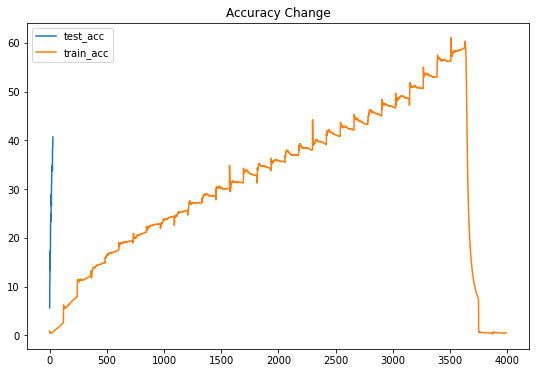

In [29]:
import matplotlib.pyplot as plt
def plot_curve(curves,title,Figsize = (7,7)):
    fig = plt.figure(figsize=Figsize)
    ax = plt.subplot()
    for curve in curves:
        ax.plot(curve[0], label=curve[1])
        plt.title(title)
    ax.legend()
    plt.show()
curves = [(train_test.test_acc,"test_acc"),(train_test.train_acc,"train_acc")]
plot_curve(curves,"Accuracy Change",Figsize = (9,6))